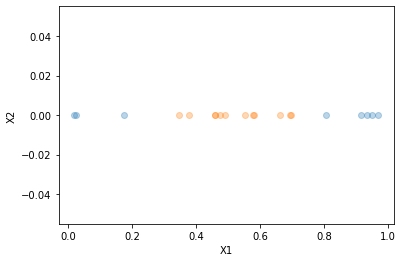

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [496]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,1))
    y = np.logical_and(X>0.2, X<0.8)[:,0]*1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

X, y = geradataset()
X2D = np.concatenate((X,np.zeros(X.shape)),axis=1)
plotadataset(X2D, y)
plt.show()
y

# Funções de Custo

# Algoritmos

In [497]:
class PseudoInversa():
    def __init__(self):
        pass
    def getW(self, X, y):
        pinv = np.linalg.pinv(X)
        w = np.matmul(pinv,y)
        return w


# Funções de Ativação

In [498]:
from scipy.special import expit

def sign(a):
    return (a >= 0) * 2 - 1

def tanh(a):
    return expit(a) * 2 - 1

In [499]:
from sklearn.base import BaseEstimator, ClassifierMixin

class ExtremeLearningMachine(BaseEstimator, ClassifierMixin):
    def __init__(self, algoritmo=PseudoInversa(), activation=tanh):
        self.wih = None
        self.w = None
        self.threshold = 0
        self.activation = activation
        self.algoritmo = algoritmo
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        self.wih = np.random.uniform(size=(X.shape[1],X.shape[1]+1))
        Xh = np.matmul(X,self.wih)
        Xho = self.activation(Xh)
        Xb = ExtremeLearningMachine.includebias(Xho)
        self.labels = list(set(y))
        y = label_binarize(y, classes=self.labels)*2-1
        if len(self.labels) == 2 :
            y = y[:,0:1]
        if hasattr(self.algoritmo, 'custo') and (not hasattr(self.algoritmo.custo, 'preactivated') or not self.algoritmo.custo.preactivated):
            self.w = self.algoritmo.getW(Xb, y, self.activation)
        else:
            self.w = self.algoritmo.getW(Xb, y)

    def predict(self, X):
        Xh = np.matmul(X,self.wih)
        Xho = self.activation(Xh)
        Xb = ExtremeLearningMachine.includebias(Xho)
        a = np.matmul(Xb, self.w)
        if self.w.shape[1] > 1:
            idx = np.argmax(a, axis=1) 
        else:
            idx = np.array(self.activation(a) > self.threshold, dtype=int)[:,0]
        ypred = np.array([self.labels[i] for i in idx])
        return ypred


0.95
[[ 1819.9879301 ]
 [-7678.65252063]] [-1.25382181]
(20, 2)


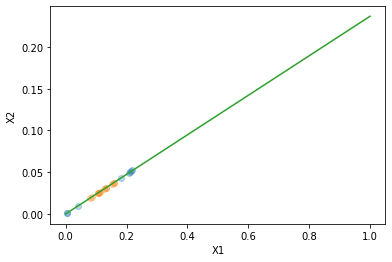

In [500]:
elm = ExtremeLearningMachine()
elm.fit(X, y)
ypred = elm.predict(X)
print(sum(y == ypred)/len(y))
print(elm.w[1:], elm.w[0])

Xnew = elm.activation(np.matmul(X,elm.wih))
print(Xnew.shape)

plotadataset(Xnew, y)
if len(set(y)) > 2:
    for i in range(len(set(y))):
        plotahiperplano(elm.w[1:,i], elm.w[0,i], min(Xnew[:,0]), max(Xnew[:,0]))
else:
    plotahiperplano(elm.w[1:],elm.w[0])